In [34]:
from sklearn.cluster import KMeans 
import numpy as np 
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt

import mglearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris


import warnings
warnings.simplefilter('ignore')

In [45]:
X,y = mglearn.datasets.make_forge()
x_train, x_test, y_train, y_test = train_test_split( X,y, 
                                                    test_size=0.2) #defalult 75% 25%  ,7:3

In [62]:
X

array([[ 9.96346605,  4.59676542],
       [11.0329545 , -0.16816717],
       [11.54155807,  5.21116083],
       [ 8.69289001,  1.54322016],
       [ 8.1062269 ,  4.28695977],
       [ 8.30988863,  4.80623966],
       [11.93027136,  4.64866327],
       [ 9.67284681, -0.20283165],
       [ 8.34810316,  5.13415623],
       [ 8.67494727,  4.47573059],
       [ 9.17748385,  5.09283177],
       [10.24028948,  2.45544401],
       [ 8.68937095,  1.48709629],
       [ 8.92229526, -0.63993225],
       [ 9.49123469,  4.33224792],
       [ 9.25694192,  5.13284858],
       [ 7.99815287,  4.8525051 ],
       [ 8.18378052,  1.29564214],
       [ 8.7337095 ,  2.49162431],
       [ 9.32298256,  5.09840649],
       [10.06393839,  0.99078055],
       [ 9.50048972, -0.26430318],
       [ 8.34468785,  1.63824349],
       [ 9.50169345,  1.93824624],
       [ 9.15072323,  5.49832246],
       [11.563957  ,  1.3389402 ]])

In [8]:
y

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0])

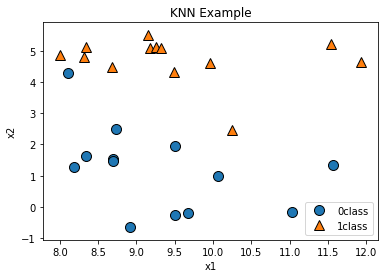

In [32]:
mglearn.discrete_scatter( X[:,0],X[:,1],y)
plt.legend( ['0class','1class'])
plt.title('KNN Example') 
plt.xlabel('x1') 
plt.ylabel('x2')
plt.show()

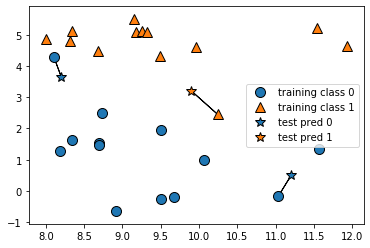

In [15]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

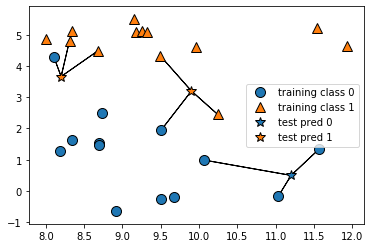

In [16]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [17]:
model_knn = KNeighborsClassifier( n_neighbors=1 )
model_knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [18]:
model_knn.predict( x_test ) 

array([1, 1, 0, 1, 0, 1])

In [19]:
y_test

array([1, 1, 0, 1, 0, 1])

In [21]:
model_knn.score(x_test, y_test)

1.0

In [25]:
param_value = {'n_neighbors':[1,2,3,4,5]}
gridSearch = GridSearchCV( KNeighborsClassifier() , param_grid=param_value)
gridSearch.fit( x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [26]:
gridSearch.best_params_

{'n_neighbors': 1}

In [27]:
gridSearch.best_score_

0.9

In [30]:
gridSearch.best_estimator_.predict(x_test)

array([1, 1, 0, 1, 0, 1])

In [31]:
y_test

array([1, 1, 0, 1, 0, 1])

In [35]:
# 연습문제
# iris데이터를 knn으로 분류하기

iris = load_iris()
iris.keys()
iris_df = pd.DataFrame(iris.data)
iris_df.columns = iris.feature_names
iris_df['specis'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),specis
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [52]:
x_data = iris_df.iloc[:,:-1]
y_data = iris_df.iloc[:,-1]

In [53]:
x_train,x_test,y_train,y_test = train_test_split(x_data , y_data,test_size = 0.3,
                                                 stratify  = y_data)

In [54]:
para_value = {'n_neighbors':[1,2,3,4,5]}
gr = GridSearchCV( KNeighborsClassifier(),param_grid= para_value)

In [55]:
gr.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [56]:
gr.best_params_

{'n_neighbors': 3}

In [57]:
gr.best_score_

0.980952380952381

In [58]:
gr.best_estimator_.predict(x_test)

array([2, 1, 2, 2, 1, 1, 1, 2, 2, 0, 0, 1, 1, 1, 0, 0, 2, 0, 0, 1, 2, 2,
       0, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 1, 2, 2, 0, 0, 0, 2, 0, 1, 2, 0,
       2])

In [60]:
mglearn.discrete_scatter( x_train[:,0],X[:,1],y)
plt.legend( ['0class','1class'])
plt.title('KNN Example') 
plt.xlabel('x1') 
plt.ylabel('x2')
plt.show()

TypeError: '(slice(None, None, None), 0)' is an invalid key

In [63]:
x_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
7,5.0,3.4,1.5,0.2
103,6.3,2.9,5.6,1.8
117,7.7,3.8,6.7,2.2
25,5.0,3.0,1.6,0.2
97,6.2,2.9,4.3,1.3
...,...,...,...,...
48,5.3,3.7,1.5,0.2
60,5.0,2.0,3.5,1.0
133,6.3,2.8,5.1,1.5
80,5.5,2.4,3.8,1.1
